In [5]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
main_df = pd.read_csv('data/kericho_community_health_data.csv')

In [7]:
main_df.head()

,household_id,sub_county,ward,village,household_size,children_under5,women_reproductive_age,water_source,toilet_type,handwashing_facility,...,referrals_completed,barrier_to_care,births_last_month,deaths_last_month,migration_in,migration_out,health_education_sessions,community_cleanups,household_visits,data_reporting_month
0,KER-AIN-0001,Kipkelion East,Cheptororiet,Kapkembu,5,3,2,Piped,Pit latrine,Yes,...,2,NaN,0,0,0,0,2,0,22,2024-08
1,KER-AIN-0002,Kipkelion West,Kunyak,Kapsoit,2,0,0,Piped,Flush,Yes,...,0,NaN,0,0,0,0,2,1,30,2024-06
2,KER-BEL-0003,Bureti,Kipchebor,Kapkembu,4,1,0,Protected well,Pit latrine,Yes,...,0,NaN,0,0,0,0,2,1,17,2024-02
3,KER-KIP-0004,Kipkelion West,Cheptororiet,Kapkembu,6,0,1,Piped,Flush,Yes,...,0,Attitude,0,0,0,0,3,2,12,2024-09
4,KER-BUR-0005,Kipkelion West,Kunyak,Chemoiben,8,3,0,River,Flush,Yes,...,1,Cost,0,0,0,0,2,1,16,2024-10


In [8]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   household_id               5000 non-null   object
 1   sub_county                 5000 non-null   object
 2   ward                       5000 non-null   object
 3   village                    5000 non-null   object
 4   household_size             5000 non-null   int64 
 5   children_under5            5000 non-null   int64 
 6   women_reproductive_age     5000 non-null   int64 
 7   water_source               5000 non-null   object
 8   toilet_type                4487 non-null   object
 9   handwashing_facility       5000 non-null   object
 10  pregnant_women             5000 non-null   int64 
 11  anc_visits                 5000 non-null   int64 
 12  skilled_delivery           5000 non-null   object
 13  postnatal_visit            5000 non-null   int64 
 14  immuniza

###### toilet_type column has null values. These cells should be filled with 'No Toilet'         

In [11]:
# Fill missing values in 'toilet_type' with 'No Toilet'

main_df['toilet_type'] = main_df['toilet_type'].fillna('No Toilet')

In [12]:
# Convert 'data_reporting_month' to datetime

main_df['data_reporting_month'] = pd.to_datetime(main_df['data_reporting_month'])

##### Geographic distribution of households

In [13]:
# Count of households by sub-county

households_per_subcounty = main_df.groupby('sub_county')['household_id'].nunique().reset_index()
households_per_subcounty.columns = ['sub_county', 'num_of_households']
households_per_subcounty


,sub_county,num_of_households
0,Ainamoi,870
1,Belgut,803
2,Bureti,812
3,Kipkelion East,842
4,Kipkelion West,852
5,Soin-Sigowet,821


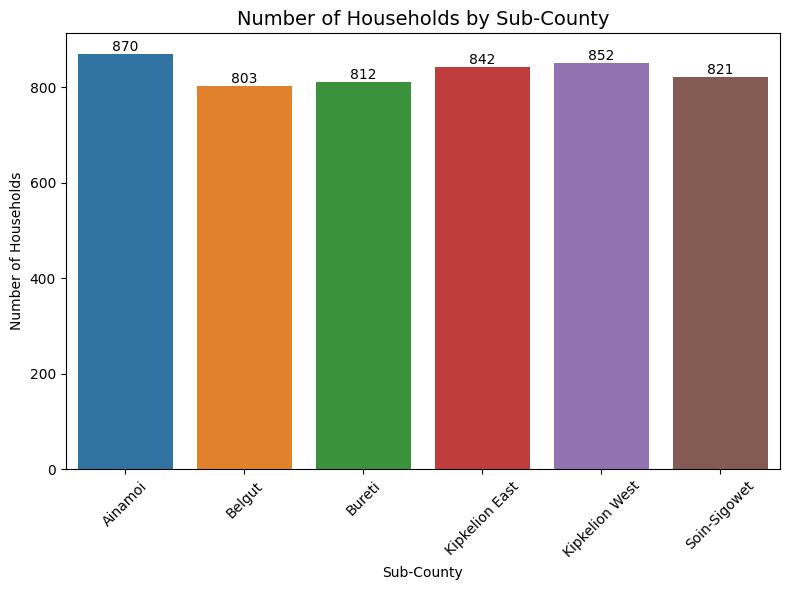

In [14]:
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=households_per_subcounty, 
    x='sub_county', 
    y='num_of_households', 
    palette='tab10', 
    hue='sub_county', 
    dodge=False,
    legend=False)
plt.title('Number of Households by Sub-County', fontsize=14)
plt.xlabel('Sub-County')
plt.ylabel('Number of Households')
plt.xticks(rotation=45)
plt.tight_layout()


for container in ax.containers:
    ax.bar_label(container, fontsize=10, label_type='edge')

plt.show()

###### The distribution of households across sub-counties in Kericho County is relatively even, with a slight variation where Ainamoi has the highest count and Belgut the lowest. This suggests that health resources, outreach, and services can be planned on a comparable scale for each sub-county, but it remains important to allocate slightly more resources to the more populous areas to ensure equitable access and effective outreach.

##### Summary statistics

In [15]:
# Overall

main_df.describe()

,household_size,children_under5,women_reproductive_age,pregnant_women,anc_visits,postnatal_visit,immunization_coverage,malnutrition_cases,malaria_cases,tb_screened,...,referrals_made,referrals_completed,births_last_month,deaths_last_month,migration_in,migration_out,health_education_sessions,community_cleanups,household_visits,data_reporting_month
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000
mean,5.038600,1.492200,0.997200,0.511800,2.006200,0.987600,75.08860,0.985600,1.218800,2.504200,...,1.501000,0.991400,0.049600,0.00900,0.026600,0.01940,2.512400,1.006800,24.552800,2024-06-19 07:53:45.600000
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,10.000000,2024-01-01 00:00:00
25%,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,63.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,1.000000,0.000000,17.000000,2024-04-01 00:00:00
50%,5.000000,1.000000,1.000000,1.000000,2.000000,1.000000,75.00000,1.000000,1.000000,2.000000,...,2.000000,1.000000,0.000000,0.00000,0.000000,0.00000,2.000000,1.000000,24.000000,2024-07-01 00:00:00
75%,7.000000,2.000000,2.000000,1.000000,3.000000,2.000000,88.00000,2.000000,2.000000,4.000000,...,3.000000,2.000000,0.000000,0.00000,0.000000,0.00000,4.000000,2.000000,32.000000,2024-10-01 00:00:00
max,8.000000,3.000000,2.000000,1.000000,4.000000,2.000000,100.00000,2.000000,7.000000,5.000000,...,3.000000,2.000000,1.000000,1.00000,1.000000,1.00000,5.000000,2.000000,39.000000,2024-12-01 00:00:00
std,2.005471,1.107513,0.810014,0.499911,1.422451,0.814604,14.65329,0.818246,1.139116,1.720516,...,1.118682,0.820403,0.217139,0.09445,0.160927,0.13794,1.702241,0.805781,8.651299,NaN


In [16]:
# By sub_county

summary = (
    main_df.groupby('sub_county').agg(
        avg_household_size=('household_size', 'mean'),
        min_household_size=('household_size', 'min'),
        max_household_size=('household_size', 'max'),
        avg_children_under_5=('children_under5', 'mean'),
        min_children_under_5=('children_under5', 'min'),
        max_children_under_5=('children_under5', 'max'),
        avg_women_reproductive_age=('women_reproductive_age', 'mean'),
        min_women_reproductive_age=('women_reproductive_age', 'min'),
        max_women_reproductive_age=('women_reproductive_age', 'max')
    ).reset_index()
)
summary

,sub_county,avg_household_size,min_household_size,max_household_size,avg_children_under_5,min_children_under_5,max_children_under_5,avg_women_reproductive_age,min_women_reproductive_age,max_women_reproductive_age
0,Ainamoi,5.064368,2,8,1.432184,0,3,1.001149,0,2
1,Belgut,5.007472,2,8,1.523039,0,3,0.987547,0,2
2,Bureti,4.963054,2,8,1.492611,0,3,0.953202,0,2
3,Kipkelion East,5.073634,2,8,1.450119,0,3,1.027316,0,2
4,Kipkelion West,4.992958,2,8,1.505869,0,3,1.025822,0,2
5,Soin-Sigowet,5.127893,2,8,1.554202,0,3,0.985384,0,2


##### Resource distribution

     water_source  percentage
0           Piped       40.80
1  Protected well       28.78
2           River       19.82
3       Rainwater       10.60


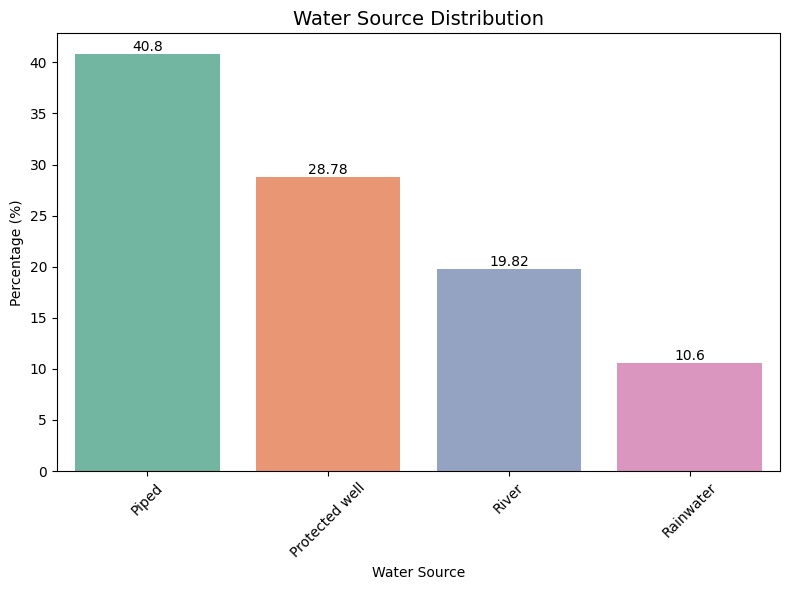

In [ ]:
# Overall water source distribution

water_source_percentage = (main_df['water_source'].value_counts(normalize=True) * 100).reset_index()
water_source_percentage.columns = ['water_source', 'percentage']
print(water_source_percentage)

# Visualize the water source distribution
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=water_source_percentage, 
    x='water_source', 
    y='percentage', 
    palette='Set2',
    hue='water_source', 
    dodge=False)
plt.title('Water Source Distribution', fontsize=14)
plt.xlabel('Water Source')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fontsize=10, label_type='edge')
plt.show()

###### Most households rely on piped water and protected wells, but a significant minority still depend on rivers and rainwater, which can be less safe. Expanding access to piped water and protected sources should be prioritized, while targeted interventions for those using river and rainwater, such as treatment and education, can improve overall community health.​

        sub_county    water_source  count  percentage
0          Ainamoi           Piped    358       41.15
1          Ainamoi  Protected well    239       27.47
2          Ainamoi       Rainwater     72        8.28
3          Ainamoi           River    201       23.10
4           Belgut           Piped    311       38.73
5           Belgut  Protected well    243       30.26
6           Belgut       Rainwater     96       11.96
7           Belgut           River    153       19.05
8           Bureti           Piped    318       39.16
9           Bureti  Protected well    230       28.33
10          Bureti       Rainwater    103       12.68
11          Bureti           River    161       19.83
12  Kipkelion East           Piped    346       41.09
13  Kipkelion East  Protected well    244       28.98
14  Kipkelion East       Rainwater     89       10.57
15  Kipkelion East           River    163       19.36
16  Kipkelion West           Piped    360       42.25
17  Kipkelion West  Protecte

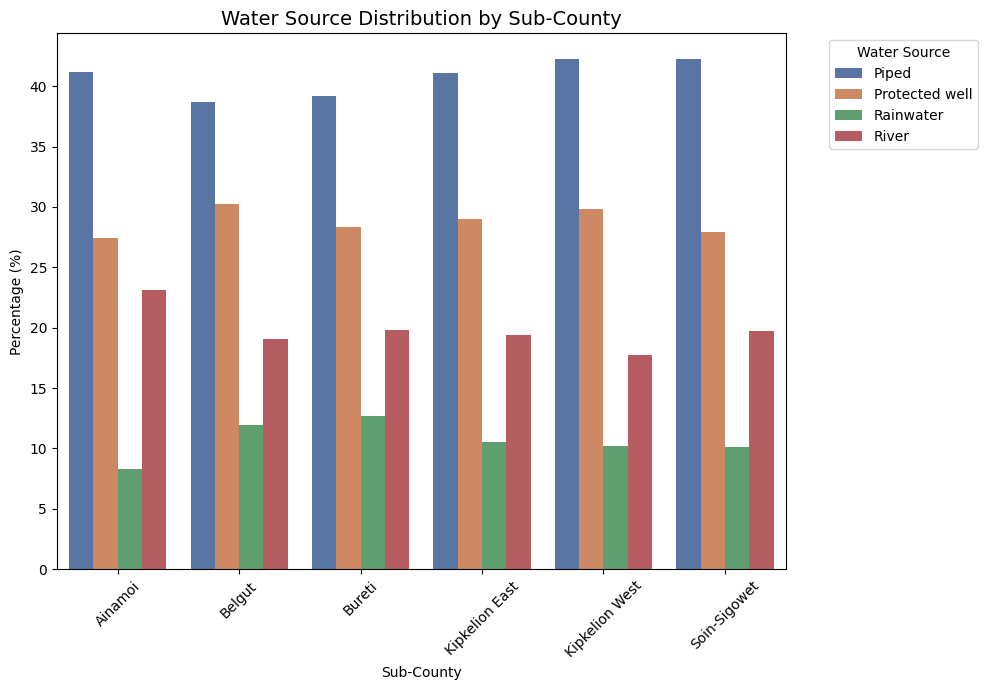

In [48]:
# Water distribution by sub-county
water_source_by_subcounty = (
    main_df.groupby(['sub_county', 'water_source'])
    .size()
    .reset_index(name='count')
)

water_source_by_subcounty['percentage'] = (
    water_source_by_subcounty
    .groupby('sub_county')['count']
    .transform(lambda x: (x / x.sum()) * 100)
    .round(2)
)

print(water_source_by_subcounty)

# Visualize water source distribution by sub-county
plt.figure(figsize=(10,7))
ax = sns.barplot(
    data=water_source_by_subcounty, 
    x='sub_county', 
    y='percentage', 
    hue='water_source', 
    palette='deep')
plt.title('Water Source Distribution by Sub-County', fontsize=14)
plt.xlabel('Sub-County')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Water Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###### Piped water is the most common source across all sub-counties, but substantial numbers of households still depend on protected wells, rivers, and rainwater. This indicates a need to strengthen infrastructure for piped water supply in all sub-counties while also providing targeted support, such as water safety interventions and resource allocation, for areas where reliance on less safe sources remains high.​

   toilet_type  percentage
0  Pit latrine       58.96
1        Flush       30.78
2    No Toilet       10.26


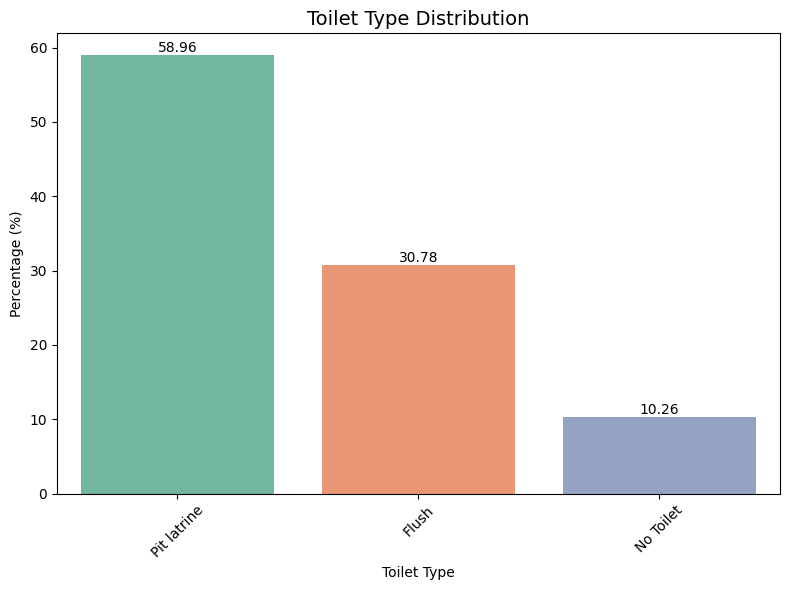

In [50]:
# Overall toilet type distribution

toilet_type_percentage = (main_df['toilet_type'].value_counts(normalize=True) * 100).reset_index()
toilet_type_percentage.columns = ['toilet_type', 'percentage']
print(toilet_type_percentage)

# Visualize the toilet type distribution
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=toilet_type_percentage, 
    x='toilet_type', 
    y='percentage', 
    palette='Set2',
    hue='toilet_type', 
    dodge=False)
plt.title('Toilet Type Distribution', fontsize=14)
plt.xlabel('Toilet Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fontsize=10, label_type='edge')
plt.show()

###### The majority of households use pit latrines, while a significant portion still relies on flush toilets and about 10% have no toilet at all. Efforts should focus on improving access to safe sanitation for those without toilets and upgrading existing pit latrines, which can lead to better community health and reduced risk of sanitation-related diseases.

        sub_county  toilet_type  count  percentage
0          Ainamoi        Flush    272       31.26
1          Ainamoi    No Toilet     85        9.77
2          Ainamoi  Pit latrine    513       58.97
3           Belgut        Flush    227       28.27
4           Belgut    No Toilet     88       10.96
5           Belgut  Pit latrine    488       60.77
6           Bureti        Flush    258       31.77
7           Bureti    No Toilet     84       10.34
8           Bureti  Pit latrine    470       57.88
9   Kipkelion East        Flush    248       29.45
10  Kipkelion East    No Toilet     94       11.16
11  Kipkelion East  Pit latrine    500       59.38
12  Kipkelion West        Flush    266       31.22
13  Kipkelion West    No Toilet     85        9.98
14  Kipkelion West  Pit latrine    501       58.80
15    Soin-Sigowet        Flush    268       32.64
16    Soin-Sigowet    No Toilet     77        9.38
17    Soin-Sigowet  Pit latrine    476       57.98


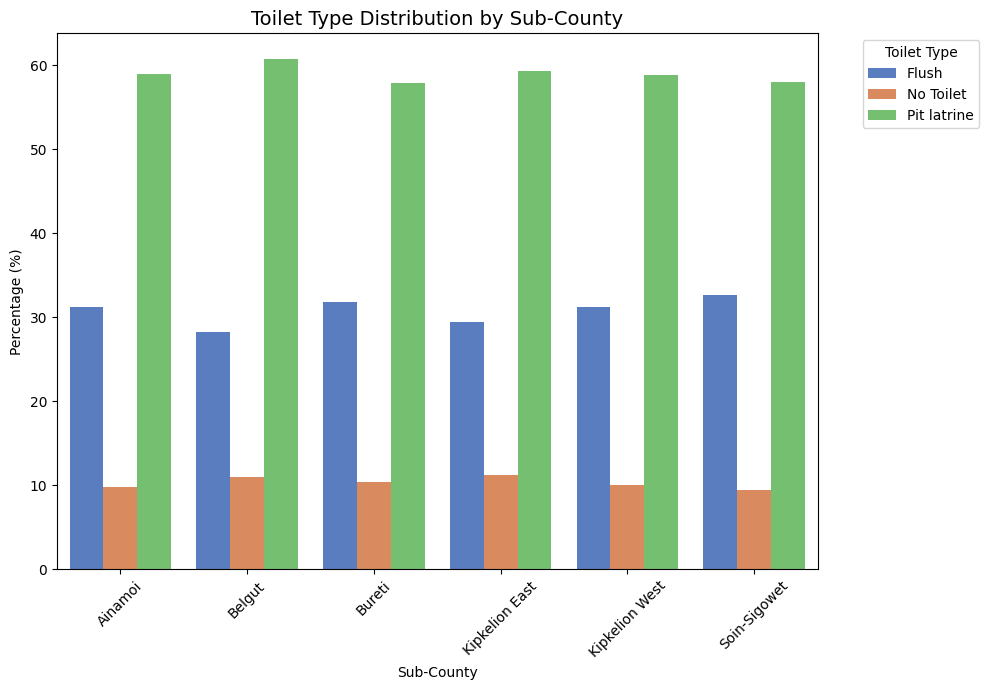

In [55]:
# Water distribution by sub-county
toilet_type_by_subcounty = (
    main_df.groupby(['sub_county', 'toilet_type'])
    .size()
    .reset_index(name='count')
)

toilet_type_by_subcounty['percentage'] = (
    toilet_type_by_subcounty
    .groupby('sub_county')['count']
    .transform(lambda x: (x / x.sum()) * 100)
    .round(2)
)

print(toilet_type_by_subcounty)

# Visualize water source distribution by sub-county
plt.figure(figsize=(10,7))
ax = sns.barplot(
    data=toilet_type_by_subcounty, 
    x='sub_county', 
    y='percentage', 
    hue='toilet_type', 
    palette='muted')
plt.title('Toilet Type Distribution by Sub-County', fontsize=14)
plt.xlabel('Sub-County')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Toilet Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###### The chart indicates that pit latrines are the predominant toilet type across all sub-counties, while flush toilets are less common and a notable minority of households still have no toilet access. Interventions should focus on improving sanitation by increasing access to flush toilets where feasible and prioritizing support for households with no toilets to reduce health risks and enhance overall community hygiene.

  handwashing_facility  percentage
0                  Yes       69.86
1                   No       30.14


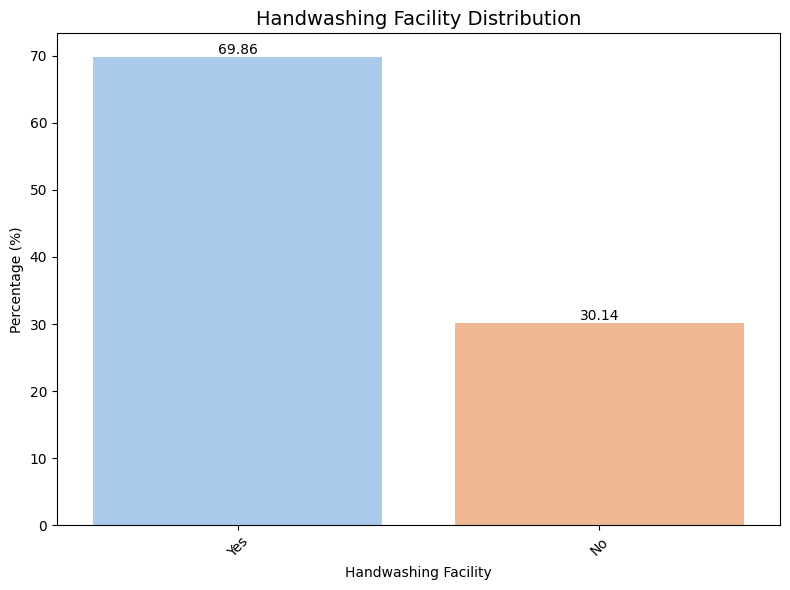

In [ ]:
# Overall handwashing facilities distribution

handwashing_facility_percentage = (main_df['handwashing_facility'].value_counts(normalize=True) * 100).reset_index()
handwashing_facility_percentage.columns = ['handwashing_facility', 'percentage']
print(handwashing_facility_percentage)

# Visualize the handwashing facility distribution
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=handwashing_facility_percentage, 
    x='handwashing_facility', 
    y='percentage', 
    palette='pastel',
    hue='handwashing_facility', 
    dodge=False)
plt.title('Handwashing Facility Distribution', fontsize=14)
plt.xlabel('Handwashing Facility')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fontsize=10, label_type='edge')
plt.show()

###### While most households have a handwashing facility, nearly a third still lack one. To reduce the risk of disease transmission and improve hygiene, local programs should prioritize increasing access to handwashing facilities for these underserved households. 

        sub_county handwashing_facility  count  percentage
0          Ainamoi                   No    251       28.85
1          Ainamoi                  Yes    619       71.15
2           Belgut                   No    246       30.64
3           Belgut                  Yes    557       69.36
4           Bureti                   No    254       31.28
5           Bureti                  Yes    558       68.72
6   Kipkelion East                   No    252       29.93
7   Kipkelion East                  Yes    590       70.07
8   Kipkelion West                   No    247       28.99
9   Kipkelion West                  Yes    605       71.01
10    Soin-Sigowet                   No    257       31.30
11    Soin-Sigowet                  Yes    564       68.70


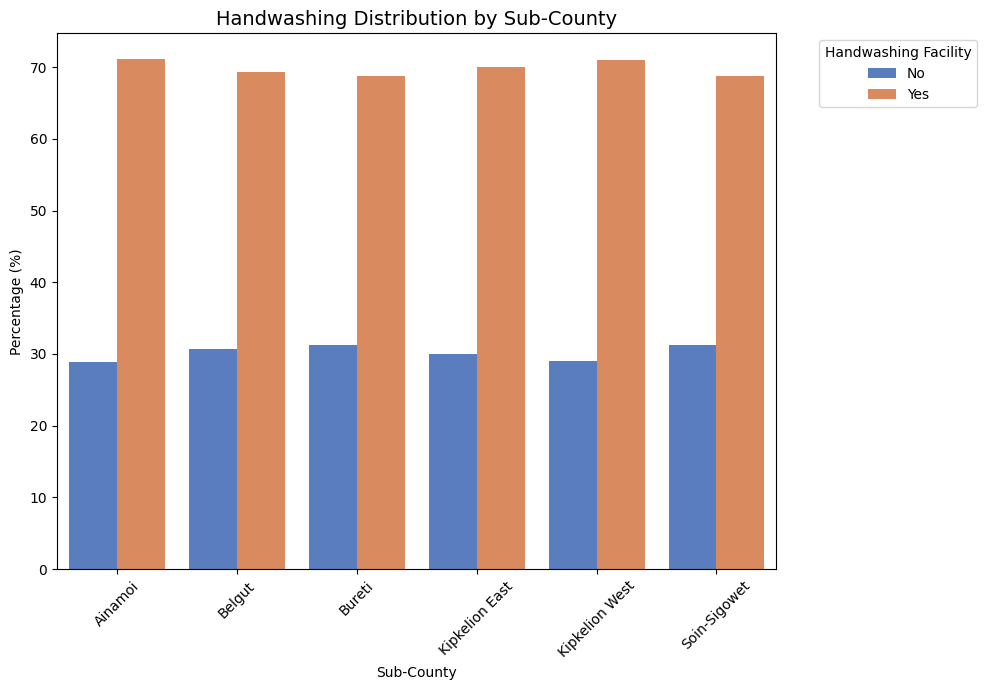

In [61]:
# Water distribution by sub-county
handwashing_facility_by_subcounty = (
    main_df.groupby(['sub_county', 'handwashing_facility'])
    .size()
    .reset_index(name='count')
)

handwashing_facility_by_subcounty['percentage'] = (
    handwashing_facility_by_subcounty
    .groupby('sub_county')['count']
    .transform(lambda x: (x / x.sum()) * 100)
    .round(2)
)

print(handwashing_facility_by_subcounty)

# Visualize water source distribution by sub-county
plt.figure(figsize=(10,7))
ax = sns.barplot(
    data=handwashing_facility_by_subcounty, 
    x='sub_county', 
    y='percentage', 
    hue='handwashing_facility', 
    palette='muted')
plt.title('Handwashing Distribution by Sub-County', fontsize=14)
plt.xlabel('Sub-County')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Handwashing Facility', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###### In every sub-county, most households have handwashing facilities, but roughly 30% do not, indicating a persistent public health gap across all regions. Action should be taken to broaden access to handwashing facilities, especially targeting the consistent minority in each sub-county that remains underserved, to improve hygiene and reduce disease risk.